Author: Chris J. Dallmann \
Affiliation: University of Wuerzburg \
Last revision: 05-May-2025

In [1]:
import pandas as pd
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

In [2]:
# Set data directory 
data_dir = r'Z:/Data/Roadrunner/CsChrimson_arena/'

In [3]:
# Load data
df = pd.read_csv(data_dir + 'Roadrunner_sinusoidal.csv') 
df

,intensity,animal_id,animal_sex,trial,frame,time,n_stimulus,n_inter_stimulus_interval,speed
0,-0.000512,1,male,1,1,0.05,0,0,0.0
1,-0.000512,1,male,1,2,0.10,0,0,0.0
2,-0.000184,1,male,1,3,0.15,0,0,0.0
3,0.000145,1,male,1,4,0.20,0,0,0.0
4,0.000145,1,male,1,5,0.25,0,0,0.0
...,...,...,...,...,...,...,...,...,...
29395,0.000145,3,male,5,2096,104.80,0,50,0.0
29396,-0.000184,3,male,5,2097,104.85,0,50,0.0
29397,-0.000184,3,male,5,2098,104.90,0,50,0.0
29398,0.000145,3,male,5,2099,104.95,0,50,0.0


In [4]:
# Pool data across stimulus repetitions 
animal_ids = [1,2,3]
sampling_rate = 20
stimulus_duration = 5
inter_stimulus_interval = 5
filter_size = 4 # Frames

mean_speeds = np.zeros(((stimulus_duration+inter_stimulus_interval)*sampling_rate, len(animal_ids)))
mean_intensities = np.zeros(((stimulus_duration+inter_stimulus_interval)*sampling_rate, len(animal_ids)))

for animal_id in animal_ids:
    n_stimulus = df.n_stimulus[(df.n_stimulus!=0) & (df.animal_id==animal_id)].unique().tolist()
    
    speed = np.zeros(((stimulus_duration+inter_stimulus_interval)*sampling_rate, len(n_stimulus)))
    intensity = np.zeros(((stimulus_duration+inter_stimulus_interval)*sampling_rate, len(n_stimulus)))
    for n in n_stimulus:
        speed[:,n-1] = ndimage.median_filter(df.speed[((df.n_stimulus==n) & (df.animal_id==animal_id)) 
                                            | ((df.n_inter_stimulus_interval==n) & (df.animal_id==animal_id))].to_numpy(), 
                                            size=filter_size)
        
        intensity[:,n-1] = df.intensity[((df.n_stimulus==n) & (df.animal_id==animal_id))
                                            | ((df.n_inter_stimulus_interval==n) & (df.animal_id==animal_id))].to_numpy()
    
    mean_speeds[:,animal_id-1] = np.mean(speed,axis=1) 
    mean_intensities[:,animal_id-1] = np.mean(intensity,axis=1) 

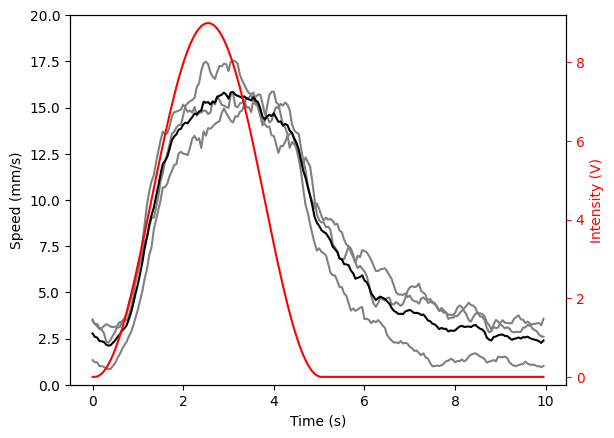

In [6]:
# Plot time course 
time = df.time[((df.n_stimulus==1) & (df.animal_id==1)) | ((df.n_inter_stimulus_interval==1) & (df.animal_id==1))].to_numpy()
time = time-time[0]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(time, mean_speeds, color=[.5,.5,.5])
ax1.plot(time, np.mean(mean_speeds,axis=1), color=[0,0,0])
ax2.plot(time, np.mean(mean_intensities,axis=1), color='r')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Speed (mm/s)')
ax1.set_ylim([0,20])
ax2.set_ylabel('Intensity (V)', color='r')
ax2.tick_params(axis='y', colors='r')
ax2.set_ylim([-.2,9.2])
#plt.savefig(r'C:\Users\Chris\Desktop\figure.eps')
plt.show()